## Lee Woodside
## HW 17.1

In [144]:
import math
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, OPTICS

### 17.1
#### i

In [145]:
def PointsInCircum(r,n=100):
    return np.array([(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)])

In [147]:
C_1 = PointsInCircum(500, 1000)
C_2 = PointsInCircum(300, 700)
C_3 = PointsInCircum(100, 300)
noise = np.random.uniform(-600,600,(300,2))

all_data = np.vstack((C_1, C_2, C_3, noise))

fig = plt.figure(figsize=(6,6))

plt.scatter(all_data[:,0], all_data[:,1], s=3)
plt.show()

### ii

In [148]:
kmeans_pred = KMeans(n_clusters=3).fit_predict(all_data)

In [150]:
fig = plt.figure(figsize=(6,6))
plt.scatter(all_data[:, 0], all_data[:, 1], s=4, c=kmeans_pred)
plt.show()

### iii

In [66]:
dbscan_pred = DBSCAN().fit_predict(all_data)

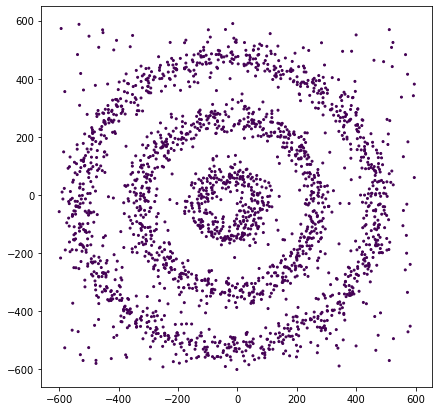

In [67]:
fig = plt.figure(figsize=(7,7))
plt.scatter(all_data[:, 0], all_data[:, 1], s=4, c=dbscan_pred)
plt.show()

### iv

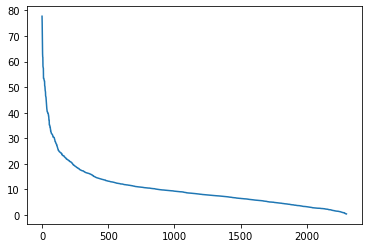

In [94]:
#X is your data set.
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(all_data)
distances, indices = nbrs.kneighbors(all_data)

plt.plot(np.sort(distances[:,1])[::-1])

In [95]:
elbow = 35

### v

In [98]:
## try again with new eps
dbscan_pred = DBSCAN(eps=elbow, min_samples=6).fit_predict(all_data)

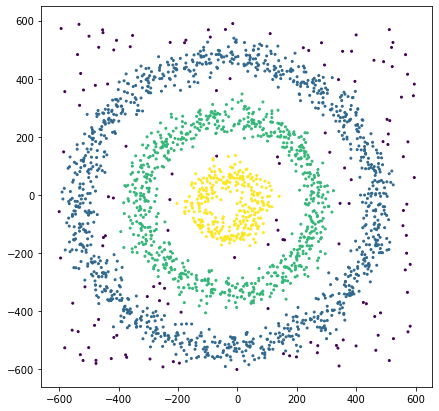

In [99]:
fig = plt.figure(figsize=(7,7))
plt.scatter(all_data[:, 0], all_data[:, 1], s=4, c=dbscan_pred)
plt.show()

## Problem 17.2

### i

In [151]:
X1=[-6, -2] + 1* np.random.randn(200, 2)
X2=[1.5, -2] + .3 * np.random.randn(200, 2)
X3=[4, -1] + .1 * np.random.randn(200, 2)
X4=[-2, 3] + .5 * np.random.randn(200, 2)
X5=[5, 6] + 2 * np.random.randn(200, 2)
X6=[3, -1.5] + 2 * np.random.randn(200, 2)
X = np.vstack((X1, X2, X3, X4, X5, X6))

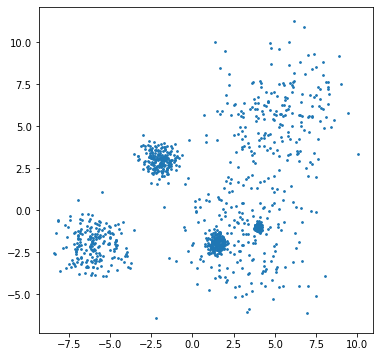

In [153]:
fig = plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], s=3)
plt.show()

## ii

In [154]:
dbscan_pred_0 = DBSCAN(eps=0.5).fit_predict(X)
dbscan_pred_1 = DBSCAN(eps=2).fit_predict(X)

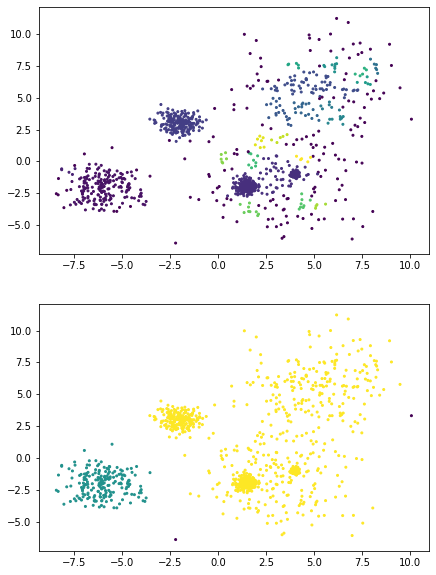

In [155]:
fig,axs = plt.subplots(2,1,figsize=(7,10))
axs[0].scatter(X[:, 0], X[:, 1], s=4, c=dbscan_pred_0)
axs[1].scatter(X[:, 0], X[:, 1], s=4, c=dbscan_pred_1)

plt.show()

## iii

In [156]:
optics_pred = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.05).fit(X)

In [157]:
space = np.arange(len(X))
reachability = optics_pred.reachability_[optics_pred.ordering_]
labels = optics_pred.labels_[optics_pred.ordering_]

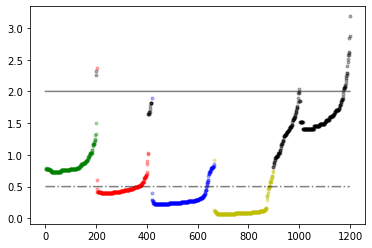

In [158]:
# Reachability plot
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    plt.plot(Xk, Rk, color, alpha=0.3)
plt.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
plt.plot(space, np.full_like(space, 2.0, dtype=float), "k-", alpha=0.5)
plt.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)

plt.show()

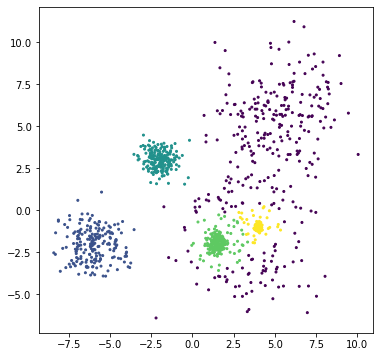

In [160]:
preds = optics_pred.labels_
fig = plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=preds, s=4)

plt.show()

## 17.4

## i

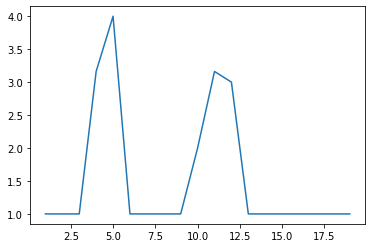

In [141]:
X = np.array([[1,1],[2,1],[1,2],[2,2],[3,5],[3,9],[3,10],[4,10],[4,11],[5,10],[7,10],[10,9],[10,6],[9,5],[10,5],[11,5],[9,4],[10,4],[11,4],[10,3]])
optics_pred = OPTICS(eps=5, min_samples=2).fit(X)

reachability = optics_pred.reachability_[optics_pred.ordering_]

plt.plot(reachability)
plt.show()

## ii

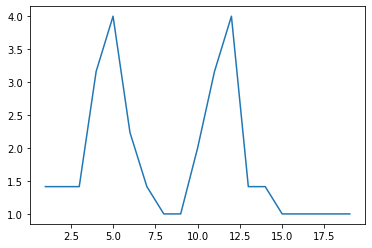

In [142]:
optics_pred = OPTICS(eps=5, min_samples=4).fit(X)

reachability = optics_pred.reachability_[optics_pred.ordering_]

plt.plot(reachability)
plt.show()

## iii

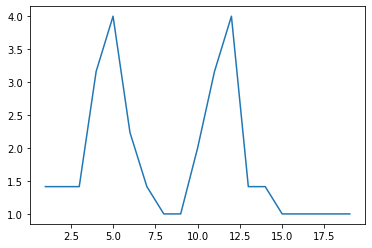

In [143]:
optics_pred = OPTICS(eps=2, min_samples=4).fit(X)

reachability = optics_pred.reachability_[optics_pred.ordering_]

plt.plot(reachability)
plt.show()